In [1]:
import os
import torch.nn as nn
import numpy as np
from random import shuffle
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader
from tqdm import tqdm
# from preprocess.focal_loss import FocalLoss
# from utils.svdd_loss import SVDDLoss
from dataloader.svdd_dataloader import CollisionLoader_audio as CollisionLoader_new
from nets.svdd_net import FusionNet_new as FusionNet
from utils.reconstruction_loss import ReconstructionLoss_audio as ReconstructionLoss
%matplotlib inline
torch.manual_seed(42)
np.random.seed(42)

train_audio = '/home/iot/collision_detect/new_data/audio_np/Normal_test'
train_imu = '/home/iot/collision_detect/new_data/imu_np/Normal_test'

test_audio = '/home/iot/collision_detect/new_data/audio_np/Abnormal'
test_imu = '/home/iot/collision_detect/new_data/imu_np/Abnormal'




workers = 4
batchsize = 64
dropout_rate = 0.3
kernel_num = 32
feature_dim = 128
num_class = 2
use_attention = 1
Epoch = 200
checkpoint_path = f'/home/iot/collision_detect/output/DSVDD_new_1/last_model.pth'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
reconstruction_loss_fn = ReconstructionLoss()
loss_function = nn.MSELoss()


train_data = CollisionLoader_new(train_imu,train_audio,train=True)
val_data   = CollisionLoader_new(test_imu,test_audio,train=False)
train_dataloader = DataLoader(train_data, batchsize, shuffle=True, num_workers=workers, drop_last=True)
val_dataloader   = DataLoader(val_data, batchsize, shuffle=True, num_workers=workers, drop_last=True)

random_tensor = torch.load('/home/iot/collision_detect/center_new.pth').to(device)
# print(random_tensor.shape,random_tensor)
model = FusionNet(use_crossattention=use_attention, feature_dim=feature_dim, dropout_rate=dropout_rate, kernel_num=kernel_num, classes=num_class)
model = model.to(device)

if checkpoint_path != '':
    model.load_state_dict(torch.load(checkpoint_path))
    print('Load weights')


cuda
Load weights


(-0.5, 0.5)

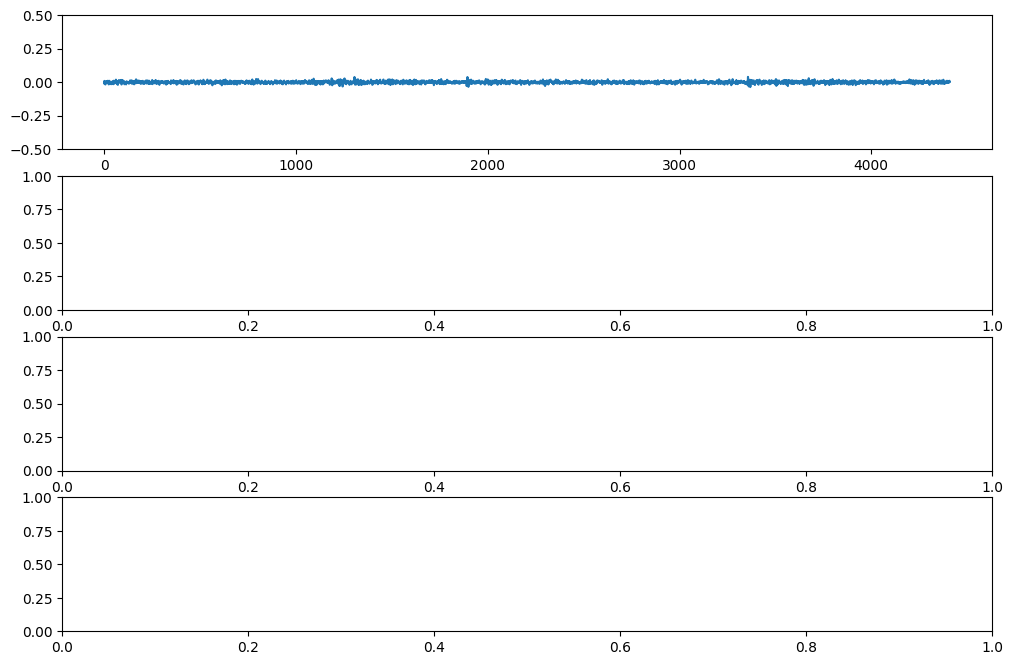

In [2]:
model.eval()
sample_idx = 29# p
# Assuming the necessary libraries and data are already imported and available in the current context

# Your existing code to get the anomaly score, reconstructed audio, and reconstructed IMU
spec, image, audio, _, _ = train_data[sample_idx]
spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)

# anomaly_score, reconstructed_audio, reconstructed_imu = model(audio, image)
# reconstruction_loss = reconstruction_loss_fn(audio, reconstructed_audio)

# target_zero = random_tensor.unsqueeze(0).expand(1, -1)
# svdd_loss = loss_function(anomaly_score, target_zero)
# total_loss = svdd_loss + reconstruction_loss

# # Print the losses
# print(f"Reconstruction Loss {reconstruction_loss.item():.4f}")
# print(f"SVDD Loss for Sample: {svdd_loss.item():.4f}")

# Prepare data for plotting
original_audio = audio.cpu().detach().numpy().squeeze()[0]
# reconstructed_audio = reconstructed_audio.cpu().detach().numpy().squeeze()[0]

# original_imu = image.cpu().detach().numpy().squeeze()
# reconstructed_imu = reconstructed_imu.cpu().detach().numpy().squeeze()
# Calculate errors
# audio_error = original_audio - reconstructed_audio
# imu_error = original_imu - reconstructed_imu

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(12, 8))

# Original and reconstructed audio signals
axes[0].plot(original_audio, label='Original Audio')
# axes[0].plot(reconstructed_audio, label='Reconstructed Audio', linestyle='dashed')Copy3
# axes[0].legend()
# axes[0].set_title('Original and Reconstructed Audio')
axes[0].set_ylim(-0.5, 0.5)

# # Error in audio signals
# axes[1].plot(audio_error, label='Audio Error', color='red',linestyle='dashed')
# # axes[1].legend()
# # axes[1].set_title('Audio Reconstruction Error')
# axes[1].set_ylim(-0.5, 0.5)

# # Original and reconstructed IMU signals
# axes[2].plot(original_imu, label='Original IMU')
# axes[2].plot(reconstructed_imu, label='Reconstructed IMU', linestyle='dashed')
# # axes[2].legend()
# # axes[2].set_title('Original and Reconstructed IMU')
# axes[2].set_ylim(0.5, 1.5)

# # Error in IMU signals
# axes[3].plot(imu_error, label='IMU Error', color='red', linestyle='dashed')
# # axes[3].legend()
# # axes[3].set_title('IMU Reconstruction Error')
# axes[3].set_ylim(-0.5, 0.5)

# plt.tight_layout()
# plt.show()



torch.Size([1, 128])
Reconstruction Loss 0.0049
SVDd Loss for Sample: 0.0011


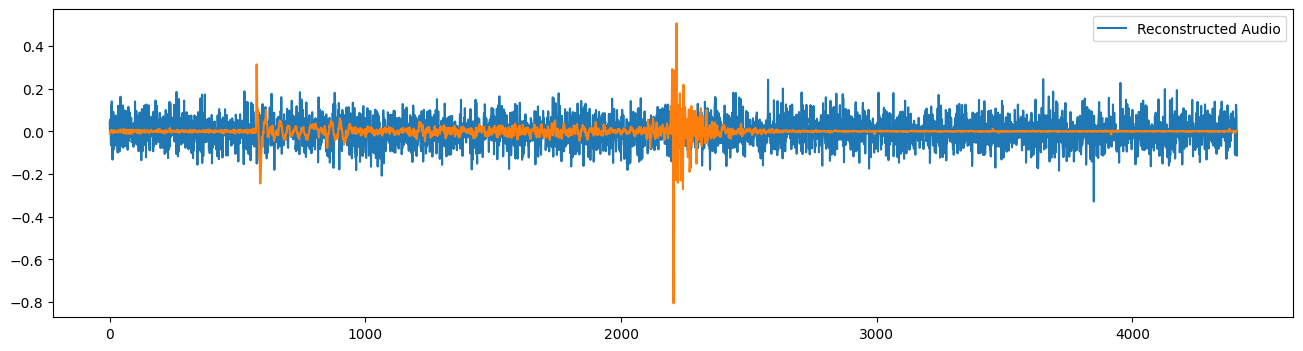

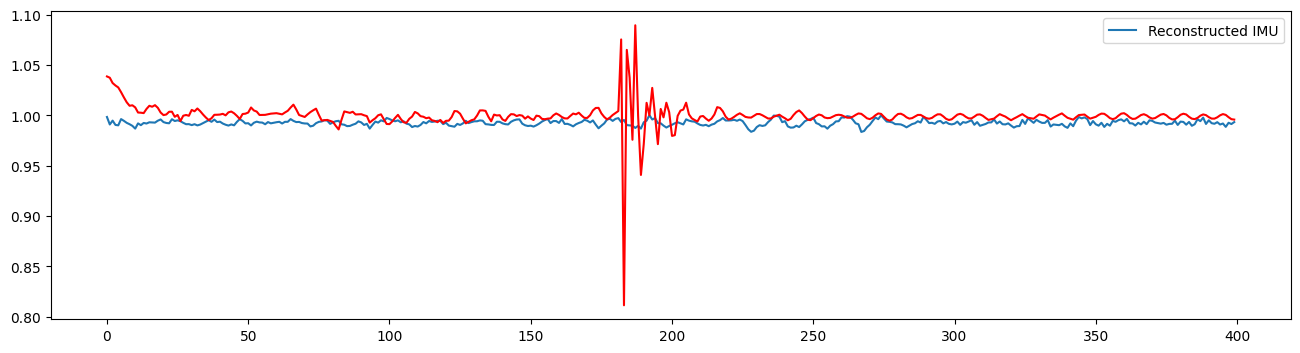

In [3]:
model.eval()
sample_idx = 93# print(audio.shape)5
# Change this to the index of the sample you want to load
spec, image, audio,_,_ = val_data[sample_idx]
spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)

anomaly_score, reconstructed_audio, reconstructed_imu= model(audio, image)
print(anomaly_score.shape)
reconstruction_loss = reconstruction_loss_fn( audio, reconstructed_audio)
target_zero = random_tensor.unsqueeze(0).expand(1, -1)
svdd_loss = loss_function(anomaly_score, target_zero)
total_loss = svdd_loss+reconstruction_loss

print(f"Reconstruction Loss {reconstruction_loss.item():.4f}")
print(f"SVDd Loss for Sample: {svdd_loss.item():.4f}")
plt.figure(figsize=(16, 4))
plt.plot(reconstructed_audio.cpu().detach().numpy().squeeze()[0], label='Reconstructed Audio')
plt.plot(audio.cpu().numpy().squeeze()[0])
plt.legend()

plt.figure(figsize=(16, 4))
plt.plot(reconstructed_imu.cpu().detach().numpy().squeeze(), label='Reconstructed IMU')
plt.plot(image.cpu().numpy().squeeze(), 'r')
plt.legend()


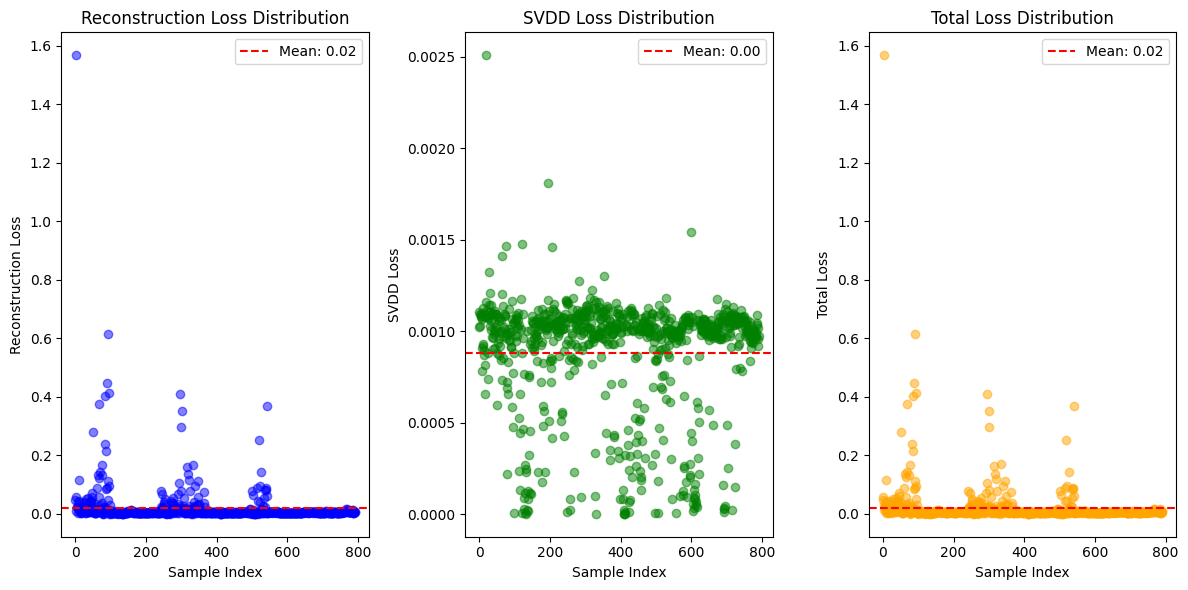

In [4]:
import matplotlib.pyplot as plt

# Initialize lists to store individual loss values
reconstruction_losses_val = []
svdd_losses_val = []
total_losses_val = []
total_z_val = []
total_sample = 0
# Iterate over the dataset to collect individual losses
with torch.no_grad():
    for sample_idx in range(len(val_data)):
        spec, image, audio,_,_ = val_data[sample_idx]
        spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)
        # print(image.shape,audio.shape,sample_idx)
    # Forward pass through the model
        anomaly_score, reconstructed_audio, reconstructed_imu = model(audio, image)

        # Calculate reconstruction loss for the sample
        reconstruction_loss = reconstruction_loss_fn( audio[:,:,:-100], reconstructed_audio[:,:,:-100]) * 10

        # Generate random tensor for SVDD loss
        target_zero = random_tensor.unsqueeze(0).expand(spec.size(0), -1)

        # Calculate SVDD loss for the sample
        svdd_loss = loss_function(anomaly_score, target_zero)

        # Calculate total loss for the sample
        total_loss = svdd_loss + reconstruction_loss

        # Append individual loss values to the lists
        reconstruction_losses_val.append(reconstruction_loss.item())
        svdd_losses_val.append(svdd_loss.item())
        total_losses_val.append(total_loss.item())
        total_z_val.append(anomaly_score.squeeze().detach().cpu().numpy())
        total_sample+=1

# Plotting the data distribution of losses using scatter plots
mean_reconstruction_loss = sum(reconstruction_losses_val) / len(reconstruction_losses_val)
mean_svdd_loss = sum(svdd_losses_val) / len(svdd_losses_val)
mean_total_loss = sum(total_losses_val) / len(total_losses_val)

# Plotting the data distribution of losses using scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(total_sample), reconstruction_losses_val, color='blue', alpha=0.5)
plt.axhline(y=mean_reconstruction_loss, color='red', linestyle='--', label=f'Mean: {mean_reconstruction_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
# plt.ylim(min(reconstruction_losses), 0.8)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(range(total_sample), svdd_losses_val, color='green', alpha=0.5)
plt.axhline(y=mean_svdd_loss, color='red', linestyle='--', label=f'Mean: {mean_svdd_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('SVDD Loss')
plt.title('SVDD Loss Distribution')
# plt.ylim(min(svdd_losses_val), 0.32)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(total_sample), total_losses_val, color='orange', alpha=0.5)
plt.axhline(y=mean_total_loss, color='red', linestyle='--', label=f'Mean: {mean_total_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Total Loss')
plt.title('Total Loss Distribution')
# plt.ylim(min(total_losses),2)
plt.legend()

plt.tight_layout()
plt.show()

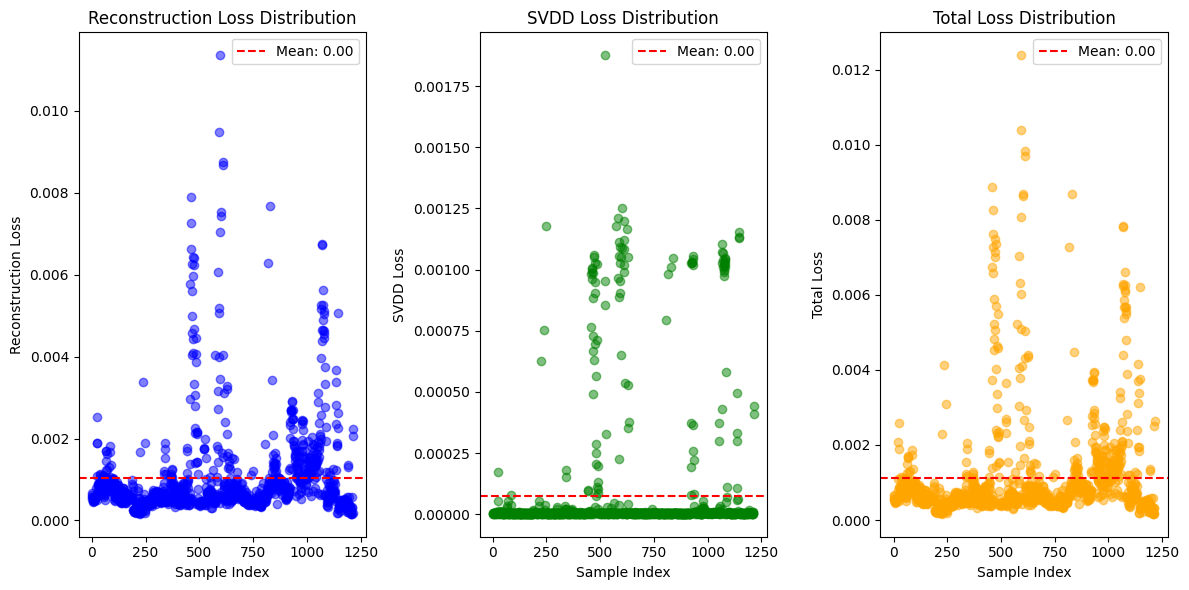

In [5]:
import matplotlib.pyplot as plt

# Initialize lists to store individual loss values
reconstruction_losses_train = []
svdd_losses_train = []
total_losses_train = []
total_z_train = []
# Iterate over the dataset to collect individual losses
with torch.no_grad():
    for sample_idx in range(len(train_data)):
        spec, image, audio,_,_ = train_data[sample_idx]
        spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)
        # Forward pass through the model
        anomaly_score, reconstructed_audio, reconstructed_imu = model(audio, image)

        # Calculate reconstruction loss for the sample
        reconstruction_loss = reconstruction_loss_fn( audio[:,:,:-100], reconstructed_audio[:,:,:-100]) * 10

        # Generate random tensor for SVDD loss
        target_zero = random_tensor.unsqueeze(0).expand(spec.size(0), -1)

        # Calculate SVDD loss for the sample0
        svdd_loss = loss_function(anomaly_score, target_zero)

        # Calculate total loss for the sample
        total_loss = svdd_loss + reconstruction_loss

        # Append individual loss values to the lists
        reconstruction_losses_train.append(reconstruction_loss.item())
        svdd_losses_train.append(svdd_loss.item())
        total_z_train.append(anomaly_score.squeeze().detach().cpu().numpy())
        total_losses_train.append(total_loss.item())

# Plotting the data distribution of losses using scatter plots
mean_reconstruction_loss = sum(reconstruction_losses_train) / len(reconstruction_losses_train)
mean_svdd_loss = sum(svdd_losses_train) / len(svdd_losses_train)
mean_total_loss = sum(total_losses_train) / len(total_losses_train)

# Plotting the data distribution of losses using scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(len(train_data)), reconstruction_losses_train, color='blue', alpha=0.5)
plt.axhline(y=mean_reconstruction_loss, color='red', linestyle='--', label=f'Mean: {mean_reconstruction_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
# plt.ylim(min(reconstruction_losses), max(reconstruction_losses)*1.1)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(range(len(train_data)), svdd_losses_train, color='green', alpha=0.5)
plt.axhline(y=mean_svdd_loss, color='red', linestyle='--', label=f'Mean: {mean_svdd_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('SVDD Loss')
plt.title('SVDD Loss Distribution')
# plt.ylim(min(svdd_losses), max(svdd_losses)*1.1)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(len(train_data)), total_losses_train, color='orange', alpha=0.5)
plt.axhline(y=mean_total_loss, color='red', linestyle='--', label=f'Mean: {mean_total_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Total Loss')
plt.title('Total Loss Distribution')
# plt.ylim(min(total_losses), max(total_losses)*1.1)
plt.legend()

plt.tight_layout()
plt.show()

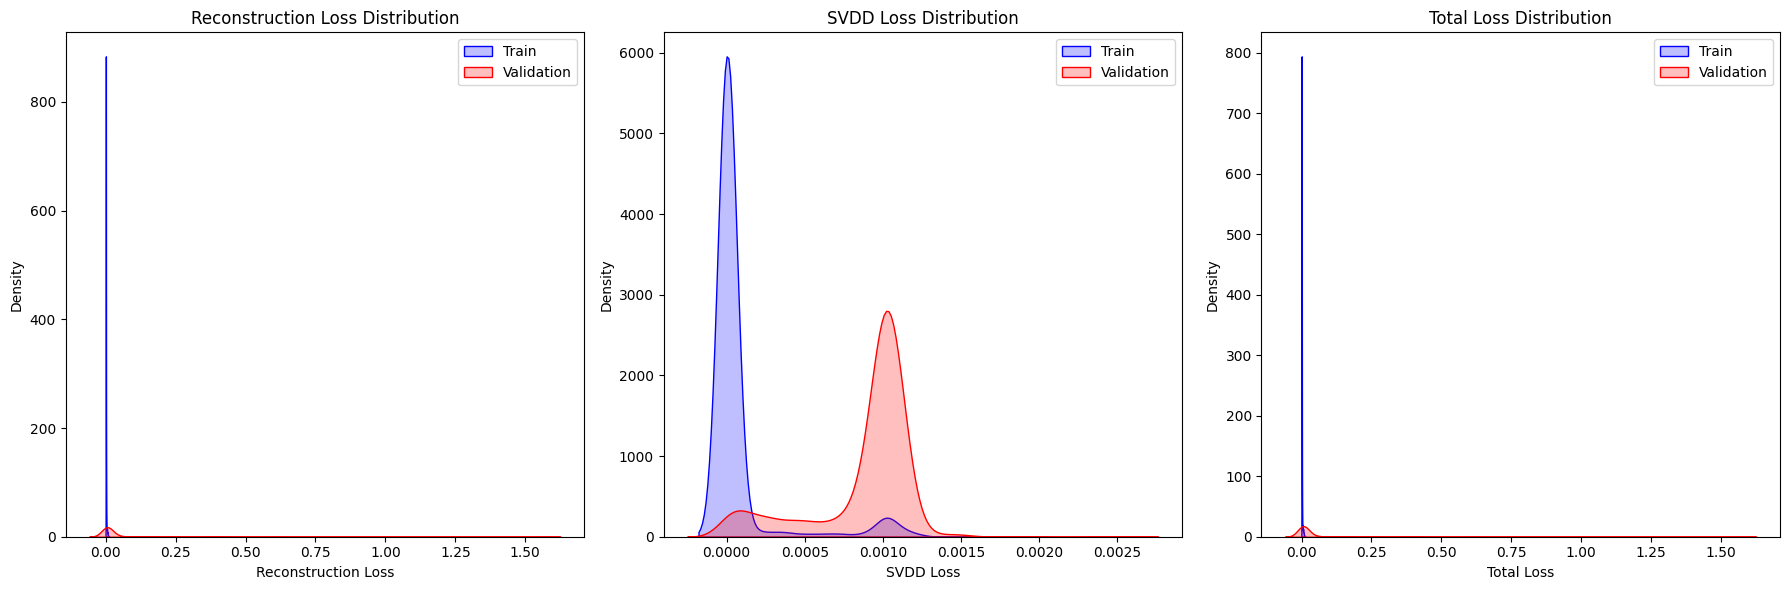

In [6]:
import seaborn as sns

# Plotting KDE plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(reconstruction_losses_train, color='blue', label='Train', fill=True)
sns.kdeplot(reconstruction_losses_val, color='red', label='Validation', fill=True)
plt.xlabel('Reconstruction Loss')
plt.ylabel('Density')
plt.title('Reconstruction Loss Distribution')
plt.legend()

plt.subplot(1, 3, 2)
sns.kdeplot(svdd_losses_train, color='blue', label='Train', fill=True)
sns.kdeplot(svdd_losses_val, color='red', label='Validation', fill=True)
plt.xlabel('SVDD Loss')
plt.ylabel('Density')
plt.title('SVDD Loss Distribution')
# plt.ylim(0, 1)
# plt.xlim(0, 40)
plt.legend()

plt.subplot(1, 3, 3)
sns.kdeplot(total_losses_train, color='blue', label='Train', fill=True)
sns.kdeplot(total_losses_val, color='red', label='Validation', fill=True)
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.title('Total Loss Distribution')
plt.legend()

plt.tight_layout()
plt.show()


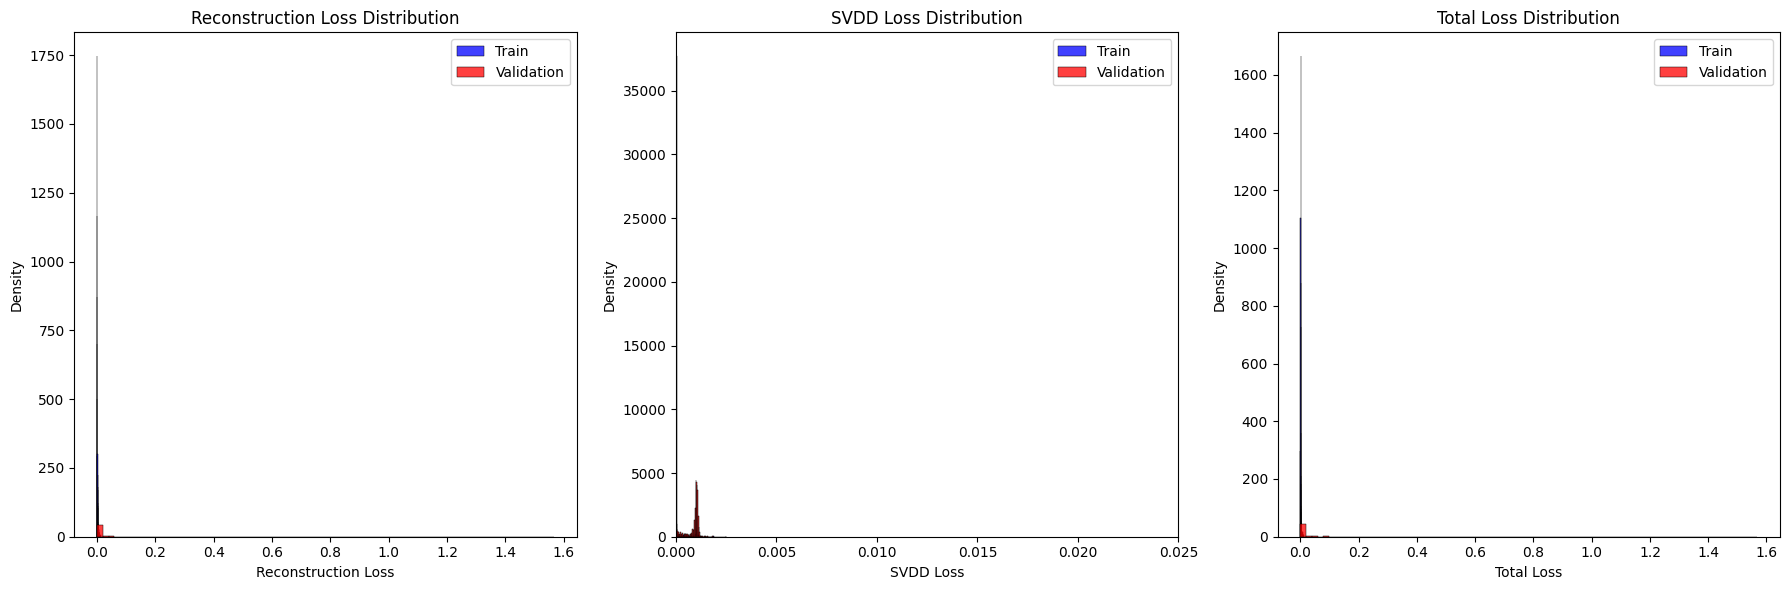

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms
plt.figure(figsize=(18, 6))

# Plot for Reconstruction Loss Distribution
plt.subplot(1, 3, 1)
sns.histplot(reconstruction_losses_train, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(reconstruction_losses_val, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('Reconstruction Loss')
plt.ylabel('Density')
plt.title('Reconstruction Loss Distribution')
plt.legend()

# Plot for SVDD Loss Distribution
plt.subplot(1, 3, 2)
sns.histplot(svdd_losses_train, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(svdd_losses_val, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('SVDD Loss')
plt.ylabel('Density')
plt.title('SVDD Loss Distribution')
# plt.ylim(0, 1)
plt.xlim(0, 0.025)
plt.legend()

# Plot for Total Loss Distribution
plt.subplot(1, 3, 3)
sns.histplot(total_losses_train, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(total_losses_val, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.title('Total Loss Distribution')

plt.legend()

plt.tight_layout()
plt.show()


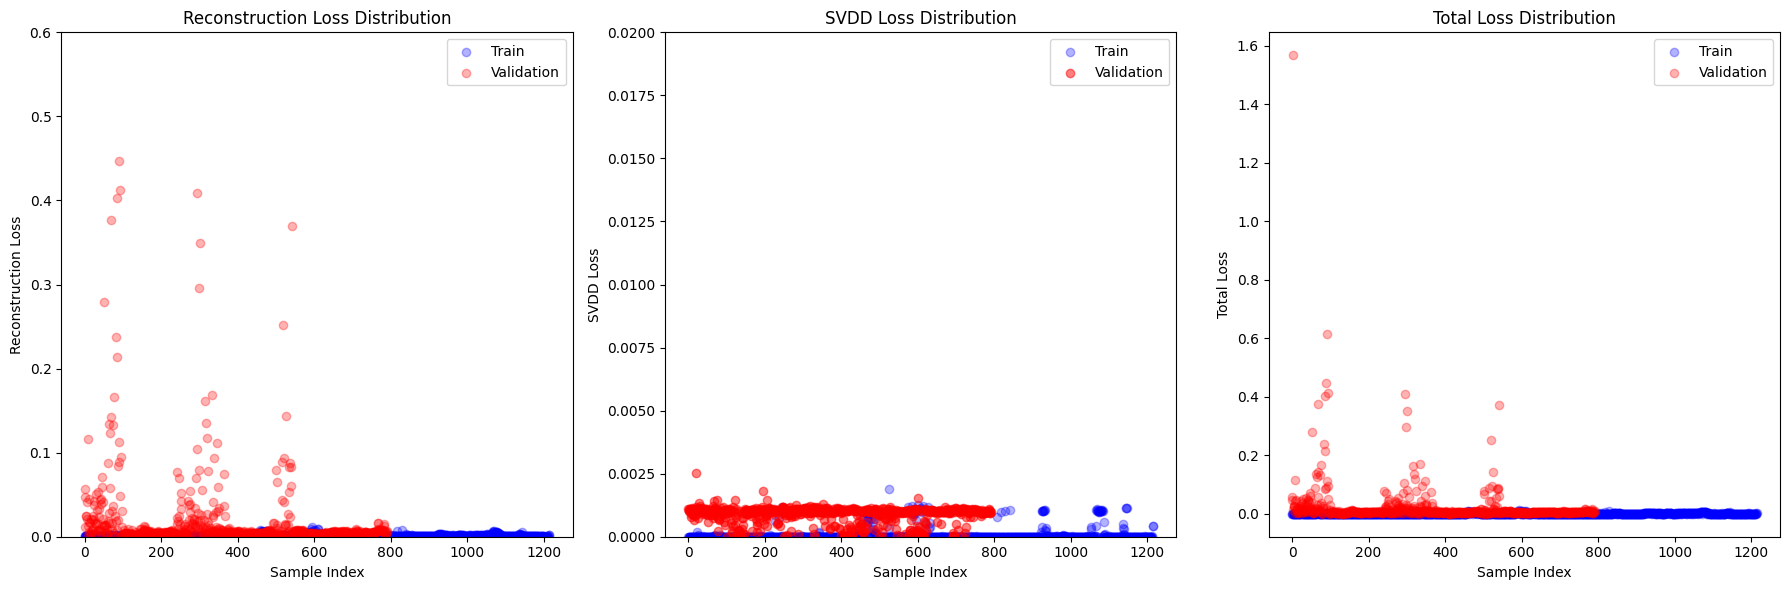

In [8]:
import matplotlib.pyplot as plt

# Plotting scatter plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(len(reconstruction_losses_train)), reconstruction_losses_train, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(reconstruction_losses_val)), reconstruction_losses_val, color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
plt.ylim(0,0.6)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(range(len(svdd_losses_train)), svdd_losses_train, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(svdd_losses_val)), svdd_losses_val, color='red', alpha=0.5, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('SVDD Loss')
plt.ylim(0,0.02)
plt.title('SVDD Loss Distribution')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(len(total_losses_train)), total_losses_train, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(total_losses_val)), total_losses_val, color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Total Loss')
# plt.ylim(0,1)
plt.title('Total Loss Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment 
def z_score_normalization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized_data = [(x - mean) / std_dev for x in data]
    return normalized_data


loss_all_audio = svdd_losses_train+svdd_losses_val
loss_all_audio = np.array(loss_all_audio)
# loss_all_audio = z_score_normalization(loss_all_audio)


loss_all_recons = reconstruction_losses_train+reconstruction_losses_val
loss_all_recons = np.array(loss_all_recons)
# loss_all_recons = z_score_normalization(loss_all_recons)

In [10]:
labels_all = np.concatenate([np.zeros(len(svdd_losses_train)),np.ones(len(svdd_losses_val))])
loss_all = [0.5*x + 0.5*y for x, y in zip(loss_all_audio, loss_all_recons)]

In [11]:
eval_metrics_svdd = ts_metrics(labels_all, (loss_all_audio))
eval_metrics_recons = ts_metrics(labels_all, (loss_all_recons))
eval_metrics_all = ts_metrics(labels_all, (loss_all))

In [12]:
print(eval_metrics_svdd[:-2])
print(eval_metrics_recons[:-2])
print(eval_metrics_all[:-2])

(0.9559939443779906, 0.8847338097125047, 0.9123599581185482, 0.8695652173913043, 0.9595959595959596)
(0.9640867972488038, 0.9356916303310057, 0.9103144139991339, 0.8863636363636364, 0.9356060606060606)
(0.9652217072036151, 0.9368617737450344, 0.9103227695805298, 0.8921212121212121, 0.9292929292929293)


In [13]:
# np.save("/home/iot/collision_detect/svdd/ploting/dsvdd_P",eval_metrics_svdd[-2])
# np.save("/home/iot/collision_detect/svdd/ploting/dsvdd_r",eval_metrics_svdd[-1])

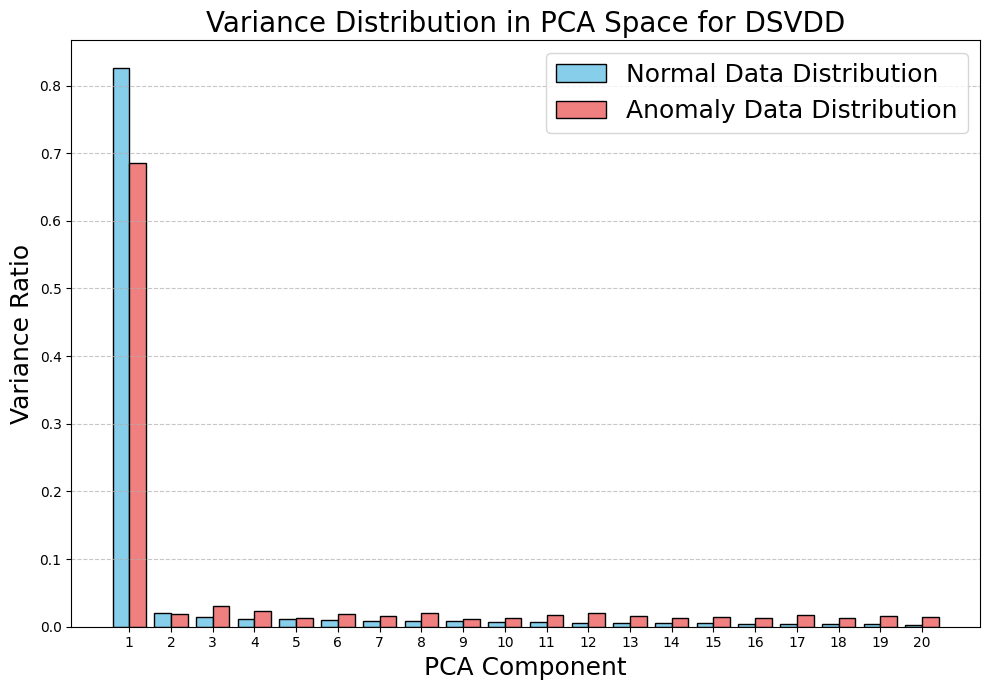

<Figure size 640x480 with 0 Axes>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming normal_features and anomaly_features are your input data
# Shapes: (n_normal, feature_dim) and (n_anomaly, feature_dim)
normal_features = total_z_train
anomaly_features = total_z_val

# Step 1: Fit PCA on normal features
pca = PCA(n_components=20)
pca.fit(normal_features)

# Step 2: Get the explained variance ratio for normal features
explained_variance_ratio = pca.explained_variance_ratio_

# Step 3: Transform both normal and anomaly features into the PCA space
normal_pca_projection = pca.transform(normal_features)
anomaly_pca_projection = pca.transform(anomaly_features)

# Step 4: Calculate variances for normal and anomaly projections in PCA space
normal_variances = np.var(normal_pca_projection, axis=0)
anomaly_variances = np.var(anomaly_pca_projection, axis=0)

# Step 5: Plot the explained variance and anomaly variances
plt.figure(figsize=(10, 7))

# Bar plot for normal feature explained variance
x = np.arange(1, len(explained_variance_ratio) + 1)  # Component indices
plt.bar(x - 0.2, explained_variance_ratio, width=0.4, color='skyblue', edgecolor='black', label='Normal Data Distribution')

# Bar plot for anomaly feature variances
plt.bar(x + 0.2, anomaly_variances / np.sum(anomaly_variances), width=0.4, color='lightcoral', edgecolor='black', label='Anomaly Data Distribution')

# Add labels and title
plt.title("Variance Distribution in PCA Space for DSVDD", fontsize=20)
plt.xlabel("PCA Component", fontsize=18)
plt.ylabel("Variance Ratio", fontsize=18)
plt.xticks(x)  # Ensure each component is labeled
plt.legend(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("pca_ours", bbox_inches='tight', pad_inches=0, dpi=300)


In [16]:
from sklearn import metrics
precision, recall, thresholds= metrics.precision_recall_curve(labels_all, (loss_all_audio))
epsilon = 1e-10

f1_scores = 2 * (precision * recall) / (precision + recall + epsilon)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
print(best_threshold)
normal_list = train_data.audio_list
indoor_group = []
outdoor_group = []

for idx, filepath in enumerate(normal_list):
    parts = filepath.split('/')
    sequence = parts[-2]  # e.g., 'iseq2', 'iseq5', 'seq16'
    file_number = int(parts[-1].split('.')[0])  # Extract file number from filename (e.g., '0' from '0.npy')

    # Check if the file belongs to the indoor group (iseq2, iseq5, or seq16 with 0-104.npy)
    if sequence in ['iseq2', 'iseq5'] or (sequence == 'seq16' and  file_number >= 104):
        indoor_group.append(idx)  # Add the index of the file
    else:
        outdoor_group.append(idx)  # Add the index of the file
print(len(indoor_group),len(outdoor_group))
indoor_losses = [svdd_losses_train[idx] for idx in indoor_group]
outdoor_losses = [svdd_losses_train[idx] for idx in outdoor_group]

8.150266512529925e-05
642 574


In [17]:
# Given threshold
threshold = best_threshold
# Example threshold, replace with actual value

# True labels for indoor and outdoor groups
true_labels_indoor = [0] * len(indoor_losses)  # All indoor samples are normal
true_labels_outdoor = [0] * len(outdoor_losses)  # All outdoor samples are anomalies

# Combine losses and true labels
all_losses = indoor_losses + outdoor_losses
all_true_labels = true_labels_indoor + true_labels_outdoor

# Calculate predicted labels based on the threshold
predicted_labels = [1 if score > threshold else 0 for score in all_losses]

# Calculate accuracy
correct_predictions = sum(pred == true for pred, true in zip(predicted_labels, all_true_labels))
total_samples = len(all_true_labels)
accuracy = correct_predictions / total_samples if total_samples > 0 else 0

# Output accuracy for both groups
print("Overall Accuracy:")
print(f"  Accuracy: {accuracy:.4f}")

# Optional: Calculate accuracy separately for indoor and outdoor groups
accuracy_indoor = sum(predicted_labels[i] == true_labels_indoor[i] for i in range(len(indoor_losses))) / len(indoor_losses) if len(indoor_losses) > 0 else 0
accuracy_outdoor = sum(predicted_labels[len(indoor_losses) + i] == true_labels_outdoor[i] for i in range(len(outdoor_losses))) / len(outdoor_losses) if len(outdoor_losses) > 0 else 0

print("\nIndoor Group Accuracy:")
print(f"  Accuracy: {accuracy_indoor:.4f}")

print("\nOutdoor Group Accuracy:")
print(f"  Accuracy: {accuracy_outdoor:.4f}")


Overall Accuracy:
  Accuracy: 0.9062

Indoor Group Accuracy:
  Accuracy: 0.9019

Outdoor Group Accuracy:
  Accuracy: 0.9111


In [18]:
abnormal_list = val_data.audio_list
mach_group = []
coli_group = []

for idx, filepath in enumerate(abnormal_list):
    parts = filepath.split('/')
    sequence = parts[-2]  # e.g., 'iseq2', 'iseq5', 'seq16'
    # file_number = int(parts[-1].split('.')[0])  # Extract file number from filename (e.g., '0' from '0.npy')

    # Check if the file belongs to the indoor group (iseq2, iseq5, or seq16 with 0-104.npy)
    if sequence in ['bl', 'br','fl','fr']:
        mach_group.append(idx)  # Add the index of the file
    else:
        coli_group.append(idx)  # Add the index of the file
        
mach_losses = [svdd_losses_val[idx] for idx in mach_group]
coli_losses = [svdd_losses_val[idx] for idx in coli_group]
print(len(mach_losses),len(coli_losses))

513 279


In [19]:
# Given threshold
threshold = best_threshold
# Example threshold, replace with actual value

# True labels for indoor and outdoor groups
true_labels_mach = [1] * len(mach_losses)  # All indoor samples are normal
true_labels_coli = [1] * len(coli_losses)  # All outdoor samples are anomalies

# Combine losses and true labels
all_losses = mach_losses + coli_losses
all_true_labels = true_labels_mach + true_labels_coli

# Calculate predicted labels based on the threshold
predicted_labels = [1 if score > threshold else 0 for score in all_losses]

# Calculate accuracy
correct_predictions = sum(pred == true for pred, true in zip(predicted_labels, all_true_labels))
total_samples = len(all_true_labels)
accuracy = correct_predictions / total_samples if total_samples > 0 else 0

# Output accuracy for both groups
print("Overall Accuracy:")
print(f"  Accuracy: {accuracy:.4f}")

# Optional: Calculate accuracy separately for indoor and outdoor groups
accuracy_mach = sum(predicted_labels[i] == true_labels_mach[i] for i in range(len(mach_losses))) / len(mach_losses) if len(mach_losses) > 0 else 0
accuracy_coli = sum(predicted_labels[len(mach_losses) + i] == true_labels_coli[i] for i in range(len(coli_losses))) / len(coli_losses) if len(outdoor_losses) > 0 else 0

print("\nmach Group Accuracy:")
print(f"  Accuracy: {accuracy_mach:.4f}")

print("\ncoli Group Accuracy:")
print(f"  Accuracy: {accuracy_coli:.4f}")


Overall Accuracy:
  Accuracy: 0.9583

mach Group Accuracy:
  Accuracy: 0.9454

coli Group Accuracy:
  Accuracy: 0.9821


In [52]:
(9454*513+9821*279)/792

9583.28409090909

In [49]:
(0.9454+0.9821)/2

0.96375

792

In [57]:
import matplotlib.pyplot as plt
model.eval()
# Initialize lists to store individual loss values
reconstruction_losses_real = []
svdd_losses_real = []
total_losses_real = []
total_z_real = []
total_sample = 0
# Iterate over the dataset to collect individual losses
with torch.no_grad():
    for sample_idx in range(len(real_data)):
        spec, image, audio,_,_ = real_data[sample_idx]
        spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)
        # print(image.shape,audio.shape,sample_idx)
    # Forward pass through the model
        anomaly_score, reconstructed_audio, reconstructed_imu = model(audio, image)

        # Calculate reconstruction loss for the sample
        reconstruction_loss = reconstruction_loss_fn( audio[:,:,:-100], reconstructed_audio[:,:,:-100]) * 10

        # Generate random tensor for SVDD loss
        target_zero = random_tensor.unsqueeze(0).expand(spec.size(0), -1)

        # Calculate SVDD loss for the sample
        svdd_loss = loss_function(anomaly_score, target_zero)

        # Calculate total loss for the sample
        total_loss = svdd_loss + reconstruction_loss

        # Append individual loss values to the lists
        reconstruction_losses_real.append(reconstruction_loss.item())
        svdd_losses_real.append(svdd_loss.item())
        total_losses_real.append(total_loss.item())
        total_z_real.append(anomaly_score.squeeze().detach().cpu().numpy())
        total_sample+=1



NameError: name 'real_data' is not defined

t-SNE completed in 1.10 seconds.


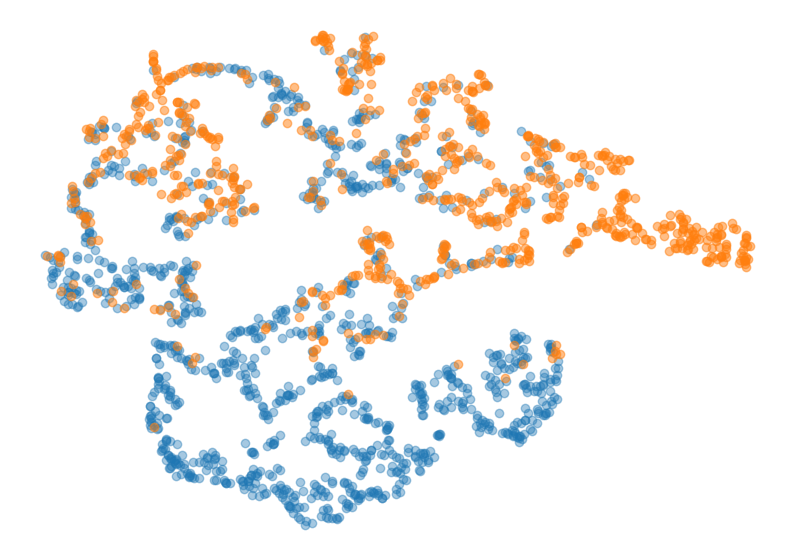

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time

# Step 1: Convert your data to NumPy arrays
X_train = np.array(total_z_train)
X_test = np.array(total_z_val)

# Step 2: Combine train and test data for t-SNE
X_combined = np.vstack((X_train, X_test))

# Step 3: Start the timer for t-SNE
time_start = time.time()

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0, n_iter=500)  # Adjust n_iter if necessary
X_tsne = tsne.fit_transform(X_combined)

# Calculate the time taken for t-SNE
time_end = time.time()
print(f"t-SNE completed in {time_end - time_start:.2f} seconds.")

# Step 4: Separate the t-SNE results back into train and test
X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

# Step 5: Plot the t-SNE results without axis and save with high resolution
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.4)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], alpha=0.5)

# Remove axis and legend (if you don't want it)
plt.axis('off')

# Save the figure with high resolution (300 DPI)
plt.savefig('/home/iot/collision_detect/svdd/ploting/figures/tsne_plot_svdd', dpi=500, bbox_inches='tight', pad_inches=0)

plt.show()


In [287]:
tab_colors = plt.get_cmap('tab10').colors

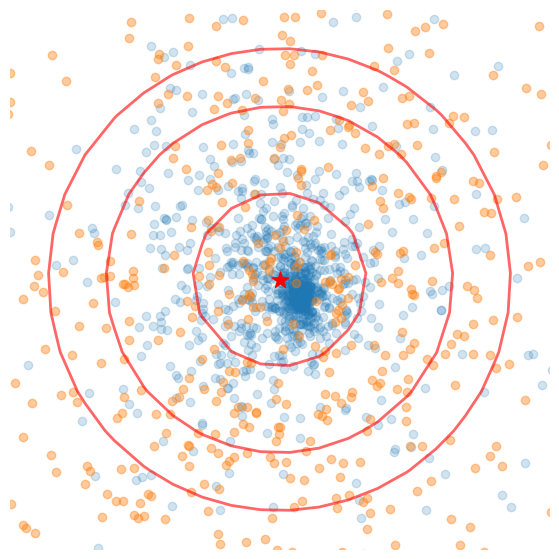

In [304]:
import torch
import numpy as np
import matplotlib.pyplot as plt
decrease_factor = 3
tab_colors = plt.get_cmap('tab10').colors

# Step 1: Load the center (assuming it's a tensor saved in the .pth file)
center = torch.load('/home/iot/collision_detect/svdd/center_2_2.pth').cpu().numpy()

# Step 2: Convert X_train and X_test to numpy arrays if not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Step 3: Define a grid of points in the space of the first two features
x_min, x_max = np.min(np.vstack((X_train_np, X_test_np))[:, 0]), np.max(np.vstack((X_train_np, X_test_np))[:, 0])
y_min, y_max = np.min(np.vstack((X_train_np, X_test_np))[:, 1]), np.max(np.vstack((X_train_np, X_test_np))[:, 1])

x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[x.ravel(), y.ravel()]

# Step 4: Calculate the Euclidean distance from each grid point to the center
distances = np.sqrt((grid_points[:, 0] - center[0])**2 + (grid_points[:, 1] - center[1])**2)
distances = distances.reshape(x.shape)

# Step 5: Plot the scatter plot and contour lines
plt.figure(figsize=(10, 7))

# Scatter plot for train and test data (swapped colors)
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2,color=tab_colors[0])
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=0.4,color=tab_colors[1])

# Contour lines based on the distance from the center (you can choose levels to represent different distances)
contour_levels =  [0.015,0.03,0.04]  # Adjust levels based on desired radii

# Contour lines for the circle
plt.contour(x, y, distances, levels=contour_levels, colors='r', linewidths=2, alpha=0.6)

# Scatter plot for the center
plt.scatter(center[0], center[1], color='r', marker='*', s=150)

# Set limits for the axes based on the center and the maximum distance desired
max_distance = np.max(contour_levels) + 0.1  # Add some padding
plt.xlim(center[0] - max_distance/decrease_factor, center[0] + max_distance/decrease_factor)
plt.ylim(center[1] - max_distance/decrease_factor, center[1] + max_distance/decrease_factor)

# plt.xlim(0,0.35)
# Set equal aspect ratio to make the contour round
plt.gca().set_aspect('equal', adjustable='box')

# Remove axis, legend, and title
plt.axis('off')

# Save the plot as a high-resolution PNG
plt.savefig('/home/iot/collision_detect/svdd/ploting/figures/contour_plot3.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()


In [133]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial import distance

# def plot_ellipsoid(mu, sigma_inv, X_train, X_test, mahalanobis_distances=[1, 2, 3]):
#     """
#     Plots the ellipsoid based on Mahalanobis distance, as well as X_train and X_test.
    
#     Parameters:
#     - mu: Mean vector.
#     - sigma_inv: Inverse covariance matrix.
#     - X_train: Training data.
#     - X_test: Test data.
#     - mahalanobis_distances: List of Mahalanobis distances to plot the ellipsoids for.
#     """
    
#     # Step 1: Define a grid of points in the space of the first two features (for visualization)
#     x_min, x_max = np.min(np.vstack((X_train, X_test))[:, 0]), np.max(np.vstack((X_train, X_test))[:, 0])
#     y_min, y_max = np.min(np.vstack((X_train, X_test))[:, 1]), np.max(np.vstack((X_train, X_test))[:, 1])
    
#     x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#     grid_points = np.c_[x.ravel(), y.ravel()]

#     # Step 2: Calculate Mahalanobis distance for each point in the grid
#     mahalanobis_grid = []
#     for point in grid_points:
#         diff = point - mu[:2]
#         mahalanobis_grid.append(np.sqrt(np.dot(np.dot(diff.T, sigma_inv[:2, :2]), diff)))

#     mahalanobis_grid = np.array(mahalanobis_grid).reshape(x.shape)

#     # Step 3: Plot the scatter plot of training and testing data
#     plt.figure(figsize=(10, 7))
#     plt.scatter(X_train[:, 0], X_train[:, 1], label='Train', alpha=0.5)
#     plt.scatter(X_test[:, 0], X_test[:, 1], label='Test', alpha=0.8, marker='x')

#     # Step 4: Plot the ellipsoid contours for specified Mahalanobis distances
#     for d in mahalanobis_distances:
#         plt.contour(x, y, mahalanobis_grid, levels=[d], colors='r', alpha=0.5, linewidths=2)
    
#     # Step 5: Plot formatting
#     plt.legend()
#     plt.title('Ellipsoid Based on Mahalanobis Distance and Data Distribution')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()

# # Example usage

# # Assuming X_train and X_test are available as NumPy arrays
# plot_ellipsoid(mu, sigma_inv, X_train, X_test)


In [134]:
# from sklearn.metrics import confusion_matrix
# import numpy as np
# model.eval()
# random_tensor = torch.load('center.pth').to(device)
# true_labels = []
# predicted_labels = []
# threshold = 0.45

# with torch.no_grad():
#     for sample_idx in range(len(val_data)):
#         spec, image, audio = val_data[sample_idx]

#         spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)

#         anomaly_score, reconstructed_audio, reconstructed_imu = model(audio, image)

#         reconstruction_loss = reconstruction_loss_fn(image, reconstructed_imu, audio, reconstructed_audio) * 10

#         target_zero = random_tensor.unsqueeze(0).expand(spec.size(0), -1)

#         # Calculate SVDD loss for the sample
#         svdd_loss = loss_function(anomaly_score, target_zero)*100

#         # Calculate total loss for the sample
#         total_loss = svdd_loss + reconstruction_loss

#         # Predict class based on total loss
#         if svdd_loss<=mean_svdd_loss:
#             predicted_class=0
#         else:
#             predicted_class=1

#         # Handle ground truth class
#         true_class = 1

#         # Update confusion matrix variables
#         true_labels.append(true_class)
#         predicted_labels.append(predicted_class)

# # Construct confusion matrix
# conf_matrix = confusion_matrix(true_labels, predicted_labels)

# print("Confusion Matrix:")
# print(conf_matrix)


In [25]:
conf_matrix = np.array([[267, 105],[48, 278]])

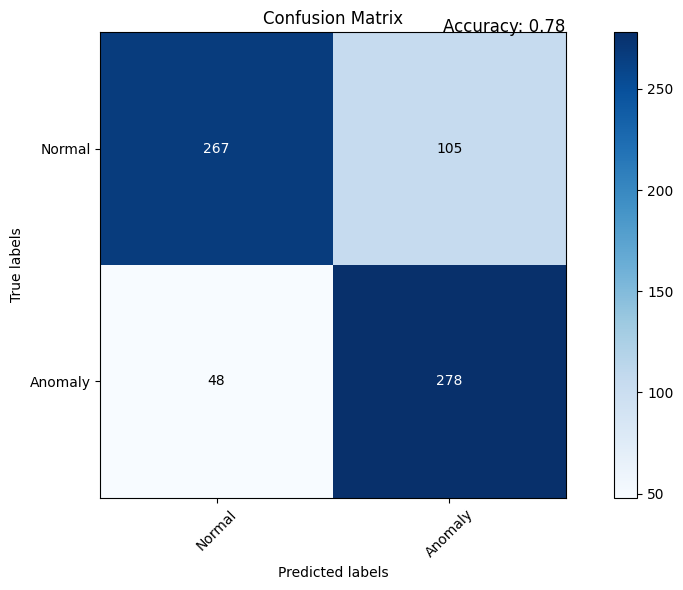

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Normal', 'Anomaly']

# Calculate accuracy
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Add counts to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Add accuracy to the plot
plt.text(1.5, -0.5, f'Accuracy: {accuracy:.2f}', color='black', fontsize=12, horizontalalignment='right')

# Eliminate grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


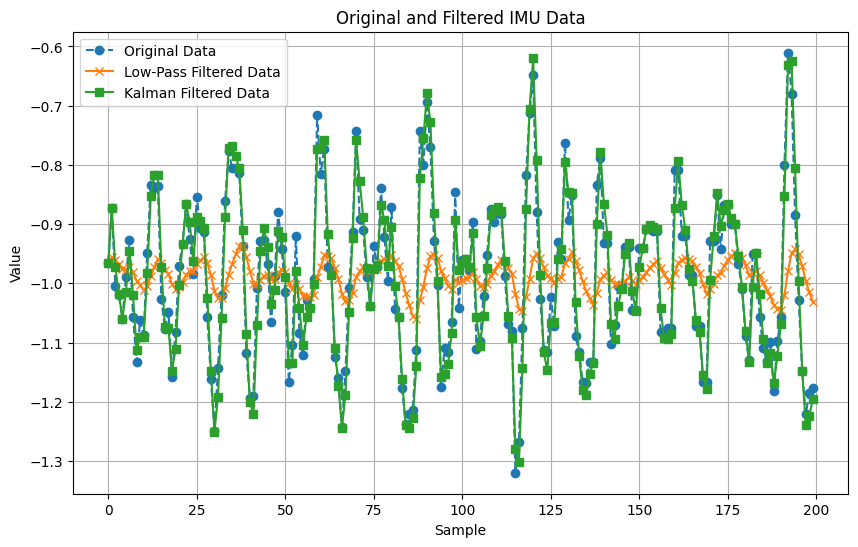

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Low-Pass Filter Class
class LowPassFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.state = None

    def filter(self, value):
        if self.state is None:
            self.state = value
        else:
            self.state = self.alpha * value + (1 - self.alpha) * self.state
        return self.state

# Kalman Filter Function
def apply_kalman_filter(data, R, Q):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])  # initial state (position and velocity)
    kf.F = np.array([[1., 1.],
                     [0., 1.]])  # state transition matrix
    kf.H = np.array([[1., 0.]])  # measurement function
    kf.P *= 1000.  # covariance matrix
    kf.R = R  # measurement noise
    kf.Q = Q  # process noise

    filtered_data = []

    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])  # we are interested in the position

    return np.array(filtered_data)

# Example IMU data (numpy array)
imu_data = np.load('/home/iot/collision_detect/data/imu/normal_train/normal_5/85.npy')[:,-1][:1000]
# Apply Low-Pass Filter
lpf = LowPassFilter(alpha=0.1)
lpf_filtered_data = np.array([lpf.filter(value) for value in imu_data])

# Apply Kalman Filter
R = 0.1  # Example measurement noise
Q = 0.1  # Example process noise
kf_filtered_data = apply_kalman_filter(imu_data, R, Q)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(imu_data, label='Original Data', linestyle='--', marker='o')
plt.plot(lpf_filtered_data, label='Low-Pass Filtered Data', linestyle='-', marker='x')
plt.plot(kf_filtered_data, label='Kalman Filtered Data', linestyle='-', marker='s')

plt.title('Original and Filtered IMU Data')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
x = np.load('/home/iot/collision_detect/new_data/imu_np/Abnormal/fl/20.npy')[:,-1]
lpf = LowPassFilter(alpha=0.1)
lpf_filtered_data = np.array([lpf.filter(value) for value in x])

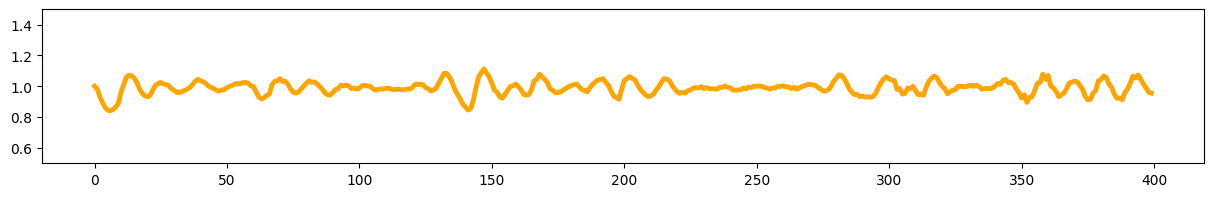

In [66]:
plt.figure(figsize=(15, 2))
plt.ylim(0.5,1.5)
plt.plot(lpf_filtered_data,color='orange',linewidth=3.5)

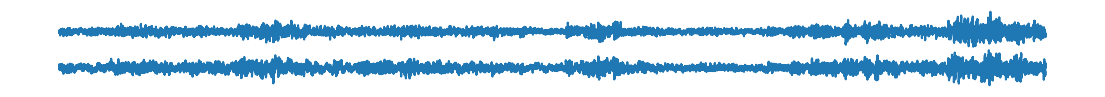

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Load the audio data
audio_data = np.load('/home/iot/collision_detect/new_data/audio_np/Abnormal/fl/20.npy')

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 1))

# Plot the first audio signal
axs[0].plot(audio_data[0])
axs[0].axis('off')  # Turn off the axis
# axs[0].set_ylim(-0.1, 0.1) 
# Plot the second audio signal
axs[1].plot(audio_data[1])
axs[1].axis('off')  # Turn off the axis
# axs[1].set_ylim(-0.1, 0.1) 
# Adjust layout to have no space between plots
plt.subplots_adjust(hspace=0.001)

# Display the plot
plt.show()


In [18]:
import os
import numpy as np
import pandas as pd

# Directory containing the .npy files
directory = "/home/iot/collision_detect/svdd/ploting"
output_directory = "/home/iot/collision_detect/svdd/ploting/output"  # Directory to save the CSV files

# Initialize dictionaries to temporarily store precision and recall values
precision_data = {}
recall_data = {}

# Loop through the files in the directory
for file in os.listdir(directory):
    if file.endswith(".npy"):
        # Load the numpy array
        array = np.load(os.path.join(directory, file))
        
        # Extract the method name and whether it's precision or recall
        method_name = file.split("_")[0]  # e.g., 'method1' from 'method1_p'
        metric_type = file.split("_")[1][:1]  # 'p' or 'r'
        
        # Store precision or recall data in the respective dictionary
        if metric_type.lower() == "p":
            precision_data[method_name] = array
        elif metric_type.lower() == "r":
            recall_data[method_name] = array

# Save each method's precision and recall data to a separate CSV
for method_name in precision_data:
    if method_name in recall_data:
        # Ensure both precision and recall have the same length
        if len(precision_data[method_name]) == len(recall_data[method_name]):
            # Create a DataFrame for this method
            method_data = {
                "Precision": precision_data[method_name],
                "Recall": recall_data[method_name]
            }
            df = pd.DataFrame(method_data)
            
            # Save the DataFrame to a CSV file
            output_csv = os.path.join(output_directory, f"{method_name}.csv")
            df.to_csv(output_csv, index=False)
            
            print(f"Data for {method_name} saved to {output_csv}")
        else:
            print(f"Warning: Length mismatch for {method_name}. Precision and Recall not saved.")
    else:
        print(f"Warning: Missing recall data for {method_name}")


Data for deepforest saved to /home/iot/collision_detect/svdd/ploting/output/deepforest.csv
Data for ovsnm saved to /home/iot/collision_detect/svdd/ploting/output/ovsnm.csv
Data for ABOD saved to /home/iot/collision_detect/svdd/ploting/output/ABOD.csv
Data for dagmm saved to /home/iot/collision_detect/svdd/ploting/output/dagmm.csv
Data for deepsvdd saved to /home/iot/collision_detect/svdd/ploting/output/deepsvdd.csv
Data for gsvdd saved to /home/iot/collision_detect/svdd/ploting/output/gsvdd.csv
Data for IF saved to /home/iot/collision_detect/svdd/ploting/output/IF.csv


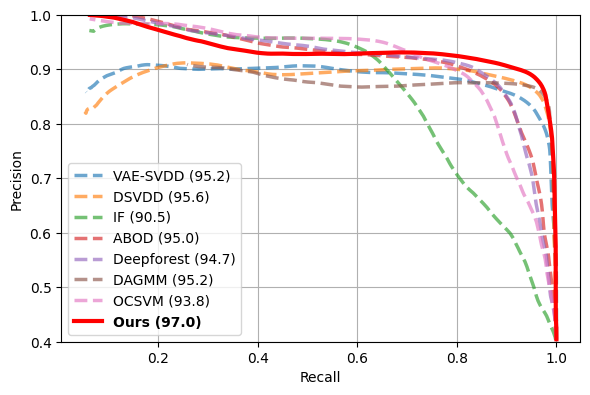

Plot saved as /home/iot/collision_detect/svdd/ploting/pr_curve_high_res.png with high resolution.


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the .npy files
directory = "/home/iot/collision_detect/svdd/ploting"

# Function to apply a moving average for smoothing
def smooth_curve(array, window_size):
    """Applies a moving average smoothing to the input array."""
    if window_size < 2 or len(array) < window_size:
        return array  # No smoothing if the array is smaller than the window
    return np.convolve(array, np.ones(window_size)/window_size, mode='valid')

# Initialize dictionaries to temporarily store precision and recall values
precision_data = {}
recall_data = {}

# Loop through the files in the directory
for file in os.listdir(directory):
    if file.endswith(".npy"):
        # Load the numpy array
        array = np.load(os.path.join(directory, file))
        
        # Extract the method name and whether it's precision or recall
        method_name = file.split("_")[0]  # e.g., 'method1' from 'method1_p'
        metric_type = file.split("_")[1][:1]  # 'p' or 'r'
        
        # Store precision or recall data in the respective dictionary
        if metric_type.lower() == "p":
            precision_data[method_name] = array
        elif metric_type.lower() == "r":
            recall_data[method_name] = array

# Plot the precision-recall curves for each method
plt.figure(figsize=(6, 4))

# Plot all methods except 'ours' first
for method_name in precision_data:
    if method_name in recall_data:
        # Ensure both precision and recall have the same length
        if len(precision_data[method_name]) == len(recall_data[method_name]):
            # Determine window size for smoothing (e.g., 5% of the curve length)
            curve_length = len(precision_data[method_name])
            window_size = max(3, int(curve_length * 0.05))  # Adjust window size dynamically

            # Apply smoothing to both precision and recall
            smooth_precision = smooth_curve(precision_data[method_name], window_size=window_size)
            smooth_recall = smooth_curve(recall_data[method_name], window_size=window_size)

            # Plot other methods with a dashed line and transparency
            if method_name.lower() != "ours (97.0)":
                # plt.plot(smooth_recall, smooth_precision, label=method_name, linestyle='--', linewidth=2, alpha=0.65)
                plt.plot(smooth_recall, smooth_precision, label=method_name, linestyle='--', linewidth=2.5, alpha=0.65)
        else:
            print(f"Warning: Length mismatch for {method_name}. Precision and Recall not plotted.")
    else:
        print(f"Warning: Missing recall data for {method_name}")

# Now, plot 'ours' last to ensure its legend appears last
if "Ours (97.0)" in precision_data and "Ours (97.0)" in recall_data:
    smooth_precision = smooth_curve(precision_data["Ours (97.0)"], window_size=window_size)
    smooth_recall = smooth_curve(recall_data["Ours (97.0)"], window_size=window_size)
    plt.plot(smooth_recall, smooth_precision, label="Ours (97.0)", linewidth=3, color='red')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a legend with all methods
legend = plt.legend(loc='lower left')  # Create the legend object

# Make the label for 'Ours (97.0)' bold
for text in legend.get_texts():
    if text.get_text() == "Ours (97.0)":
        text.set_fontweight('bold')  # Set bold font for 'Ours (97.0)'

plt.grid(True)

# Save the figure with high resolution
output_file = "/home/iot/collision_detect/svdd/ploting/pr_curve_high_res.png"
plt.tight_layout()
plt.savefig(output_file, dpi=500)  # Save figure with high resolution
plt.ylim(0.4,1.0)
# Show the plot
plt.show()

print(f"Plot saved as {output_file} with high resolution.")


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Conv1DFeatureExtractor(nn.Module):
    def __init__(self, input_channels, fc_output_dim=512, kernel_size=3):
        super(Conv1DFeatureExtractor, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=kernel_size, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=kernel_size, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64, 64, kernel_size=kernel_size, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        self.conv4 = nn.Conv1d(64, 64, kernel_size=kernel_size, stride=1, padding=1)
        self.bn4 = nn.BatchNorm1d(64)
        self.conv5 = nn.Conv1d(64, 32, kernel_size=kernel_size, stride=1, padding=1)
        self.bn5 = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.pool1 = nn.MaxPool1d(kernel_size=4, stride=4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        # self.apply(kaiming_init)
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.relu(self.bn5(self.conv5(x)))
        x = self.pool(x)
        x = x.permute(0,2,1)
        return x
        
batch_size = 16
input_channels = 2
sequence_length = 2048
model = Conv1DFeatureExtractor(input_channels=input_channels)
data = torch.randn(batch_size, input_channels, sequence_length)  # Random example data
audio_features = model(data)
print(f"Audio features shape: {audio_features.shape}")  # Should print (batch_size, 64, 32)


Audio features shape: torch.Size([16, 16, 32])


In [27]:
class FFT_CNN_IFFT_Model(nn.Module):
    def __init__(self, input_channels=2, output_dim=512, kernel_size=3):
        super(FFT_CNN_IFFT_Model, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=kernel_size, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=kernel_size, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64,32, kernel_size=kernel_size, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(32)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool1d(kernel_size=4, stride=4)
        self.pool1 = nn.MaxPool1d(kernel_size=8, stride=8)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Step 1: Compute FFT
        x = x.permute(0,2,1)
        fft_data = torch.fft.rfft(x, dim=1)  # Shape: (batch_size, freq_bins, channels)
        magnitude = torch.abs(fft_data)  # Magnitude spectrum
        magnitude = magnitude.permute(0, 2, 1)
        x = self.relu(self.bn1(self.conv1(magnitude)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.permute(0,2,1)
        return fft_data  # Return reconstructed signal and features

# Testing the Model
if __name__ == "__main__":
    batch_size = 16
    sequence_length = 2048
    channels = 2
    audio_data = torch.randn(batch_size,channels, sequence_length)  # Time-domain data
    model = FFT_CNN_IFFT_Model(input_channels=channels)
    features = model(audio.cpu())
    print(f"Extracted Features Shape: {features.shape}")  # Expected: (batch_size, output_dim)
    

Extracted Features Shape: torch.Size([1, 1027, 2])


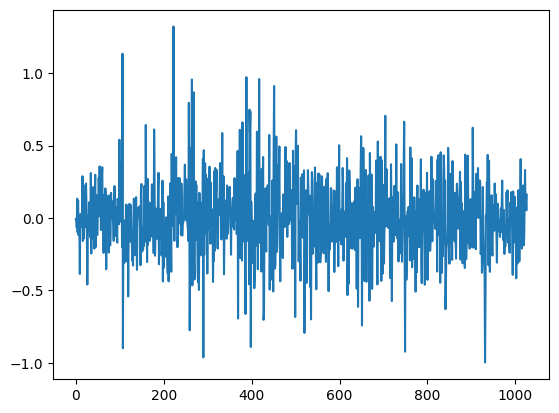

In [28]:
import matplotlib.pyplot as plt
plt.plot(features.float().numpy()[0][:,0])

In [32]:
import torch
import torch.nn as nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class CombinedFeatureExtractor(nn.Module):
    def __init__(self, fft_input_channels=2, conv_input_channels=32, embedding_dim=64, num_heads=4, num_layers=2,output_dim=512):
        super(CombinedFeatureExtractor, self).__init__()
        # FFT-based feature extractor
        self.fft_extractor = FFT_CNN_IFFT_Model()

        # Conv1D-based feature extractor
        self.conv_extractor = Conv1DFeatureExtractor(input_channels=2)

        # Transformer Encoder
        self.transformer_dim = embedding_dim  # Dimensionality of transformer embeddings
        encoder_layer = TransformerEncoderLayer(d_model=self.transformer_dim, nhead=num_heads, batch_first=True)
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Fully connected layer to map transformer output to final features
        self.fc = nn.Linear(self.transformer_dim, output_dim)

    def forward(self, x):
        # Extract features from FFT-based extractor
        fft_features = self.fft_extractor(x)  # Shape: (batch_size, seq_len, feature_dim)

        # Extract features from Conv1D-based extractor
        conv_features = self.conv_extractor(x)  # Shape: (batch_size, seq_len, feature_dim)

        # Concatenate along the feature dimension
        combined_features = torch.cat((fft_features, conv_features), dim=-1)  # Shape: (batch_size, seq_len, combined_feature_dim)

        # Pass through Transformer Encoder
        transformer_output = self.transformer_encoder(combined_features)  # Shape: (batch_size, seq_len, embedding_dim)

        # Final feature representation
        final_features = self.fc(transformer_output)  # Shape: (batch_size, seq_len, 256)

        return final_features

# Example Usage
if __name__ == "__main__":
    batch_size = 16
    input_channels = 2
    sequence_length = 2048
    data = torch.randn(batch_size, input_channels, sequence_length)  # Random example data

    # Initialize combined model
    model = CombinedFeatureExtractor(fft_input_channels=fft_channels, conv_input_channels=conv_channels)

    # Forward pass
    output_features = model(data)

    # Print output shape
    print(f"Output Features Shape: {output_features.shape}")  # Expected: (batch_size, seq_len, 256)


Output Features Shape: torch.Size([16, 16, 512])


In [38]:
class DeconvModule(nn.Module):
    def __init__(self, input_channels=32, output_channels=2, kernel_size=3):
        super(DeconvModule, self).__init__()
        self.deconv1 = nn.ConvTranspose1d(input_channels, 128, kernel_size=kernel_size, stride=2, padding=1, output_padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.deconv2 = nn.ConvTranspose1d(128, 64, kernel_size=kernel_size, stride=2, padding=1, output_padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.deconv3 = nn.ConvTranspose1d(64, 64, kernel_size=kernel_size, stride=2, padding=1, output_padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        self.deconv4 = nn.ConvTranspose1d(64, 32, kernel_size=kernel_size, stride=2, padding=1, output_padding=1)
        self.bn4 = nn.BatchNorm1d(32)
        self.deconv5 = nn.ConvTranspose1d(32, 32, kernel_size=kernel_size, stride=2, padding=1, output_padding=1)
        self.bn5 = nn.BatchNorm1d(32)
        self.deconv6 = nn.ConvTranspose1d(32, output_channels, kernel_size=5, stride=4, padding=1, output_padding=1)
        self.bn6 = nn.BatchNorm1d(output_channels)
        self.relu = nn.ReLU()
        # self.apply(kaiming_init)
    def forward(self, x):
        bs,c,f = x.size()
        x = self.relu(self.bn1(self.deconv1(x)))
        x = self.relu(self.bn2(self.deconv2(x)))
        x = self.relu(self.bn3(self.deconv3(x)))
        x = self.relu(self.bn4(self.deconv4(x)))
        x = self.relu(self.bn5(self.deconv5(x)))
        x =  self.deconv6(x)
        return x

if __name__ == "__main__":
    batch_size = 16
    input_channels = 32
    sequence_length = 16
    data = torch.randn(batch_size, input_channels, sequence_length)  # Random example data

    # Initialize combined model
    model = DeconvModule()

    # Forward pass
    output_features = model(data)

    # Print output shape
    print(f"Output Features Shape: {output_features.shape}")  # Expected: (batch_size, seq_len, 256)


Output Features Shape: torch.Size([16, 2, 2048])


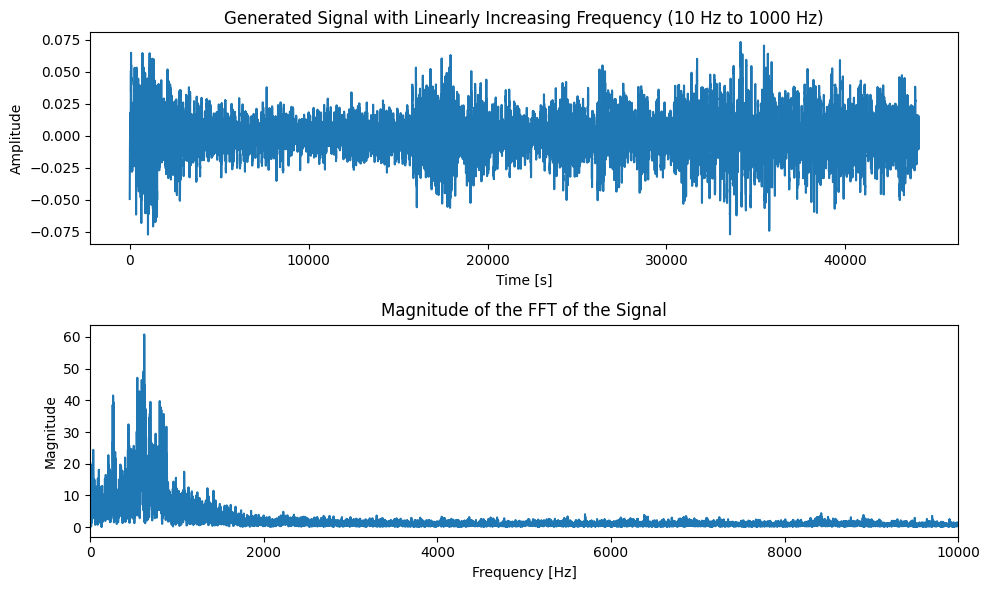

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import torch
def downsample(audio, old_sample_rate=48000, new_sample_rate=4800):
    """
    Downsample audio from old_sample_rate to new_sample_rate.
    """
    ratio = old_sample_rate // new_sample_rate
    downsampled_audio = audio[:, ::ratio]
    return downsampled_audio



# Parameters
signal = np.load('/home/iot/collision_detect/new_data/audio_np/Abnormal/fr/3.npy')
signal = downsample(signal,old_sample_rate=88200, new_sample_rate=44100)[0]

# Compute the FFT using PyTorch (rfft for real signals)
signal_tensor = torch.tensor(signal, dtype=torch.float32)
fft_signal = torch.fft.rfft(signal_tensor)

# Frequency bins (using numpy to calculate corresponding frequencies)
frequencies = np.fft.rfftfreq(44100, d=1/44100)

# Plot the signal
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Generated Signal with Linearly Increasing Frequency (10 Hz to 1000 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the magnitude of the FFT
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_signal.numpy()))
plt.title('Magnitude of the FFT of the Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0,10000)
plt.tight_layout()
plt.show()


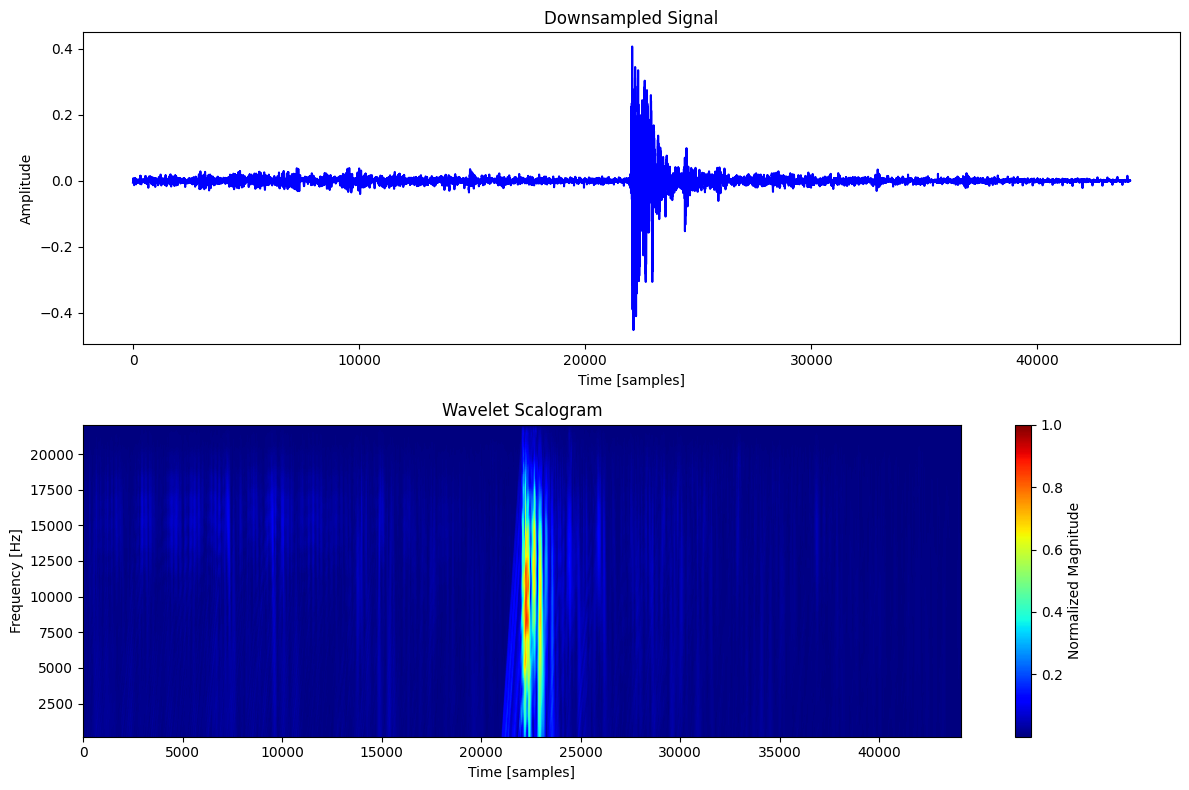

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

def downsample(audio, old_sample_rate=88200, new_sample_rate=4410):
    """
    Downsample audio from old_sample_rate to new_sample_rate.
    """
    ratio = old_sample_rate // new_sample_rate
    return audio[::ratio]

# Load and preprocess the signal
signal = np.load('/home/iot/collision_detect/new_data/audio_np/Abnormal/luggage/seq5.npy')
signal = downsample(signal[0], old_sample_rate=88200, new_sample_rate=44100)

# Define parameters for CWT
sampling_rate = 44100  # Hz
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)  # Scale range for the wavelet transform
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/sampling_rate)

# Map scales to frequencies
frequencies = pywt.scale2frequency(wavelet, scales) / (1 / sampling_rate)

# Normalize coefficients for better visibility
coefficients = np.abs(coefficients) / np.max(np.abs(coefficients))

# Plot the original signal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(signal, color='blue')
plt.title('Downsampled Signal')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')

# Plot the wavelet scalogram
plt.subplot(2, 1, 2)
plt.imshow(coefficients, extent=[0, len(signal), frequencies[-1], frequencies[0]],
           aspect='auto', cmap='jet')
plt.colorbar(label='Normalized Magnitude')
plt.title('Wavelet Scalogram')
plt.xlabel('Time [samples]')
plt.ylabel('Frequency [Hz]')
# plt.ylim(10, 1000)  # Limit frequency range to focus on relevant features
plt.tight_layout()
plt.show()
